# 2.3 통계학에서의 표본분포

In [3]:
install.packages("boot", dependencies=TRUE)

package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LG\AppData\Local\Temp\RtmpWyn0Ji\downloaded_packages


In [4]:
library(boot)
library(ggplot2)

loans_income <- read.csv(file="raw_data/loans_income.csv")[,1]
sp500_px <- read.csv(file="raw_data/sp500_px.csv")

Warning message:
"package 'boot' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

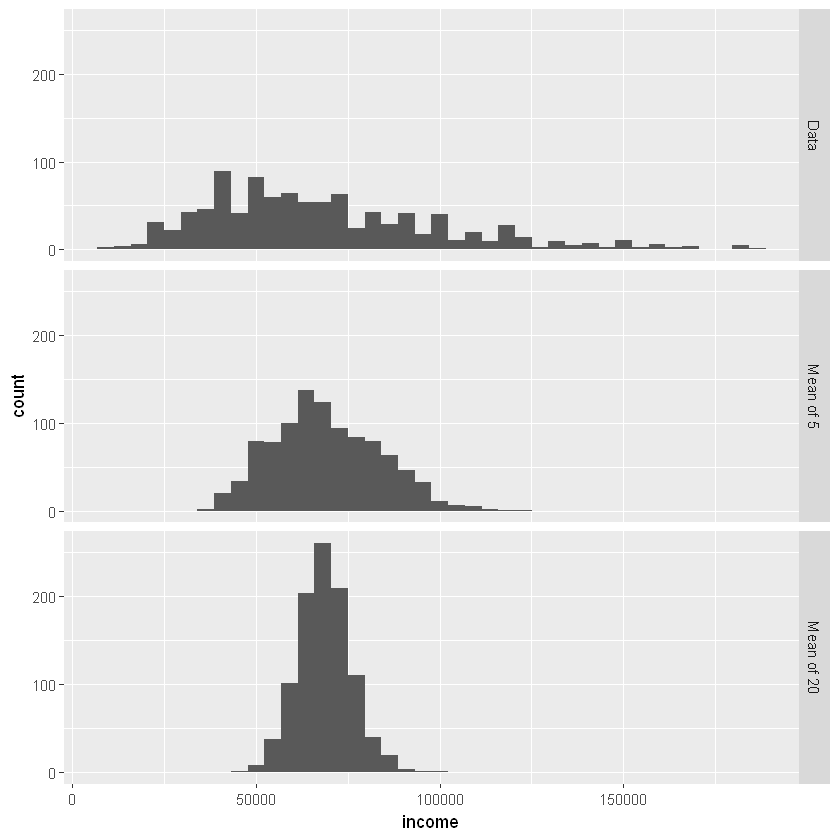

In [5]:
# take a simple random sample
samp_data <- data.frame(income=sample(loans_income, 1000), 
                        type='data_dist')
# take a sample of means of 5 values
samp_mean_05 <- data.frame(
  income = tapply(sample(loans_income, 1000*5), 
                  rep(1:1000, rep(5, 1000)), FUN=mean),
  type = 'mean_of_5')
# take a sample of means of 20 values
samp_mean_20 <- data.frame(
  income = tapply(sample(loans_income, 1000*20), 
                  rep(1:1000, rep(20, 1000)), FUN=mean),
  type = 'mean_of_20')
# bind the data.frames and convert type to a factor
income <- rbind(samp_data, samp_mean_05, samp_mean_20)
income$type = factor(income$type, 
                     levels=c('data_dist', 'mean_of_5', 'mean_of_20'),
                     labels=c('Data', 'Mean of 5', 'Mean of 20'))
# plot the histograms
ggplot(income, aes(x=income)) +
  geom_histogram(bins=40) +
  facet_grid(type ~ .)

# 2.4 부트스트랩

In [6]:
stat_fun <- function(x, idx) median(x[idx])
boot_obj <- boot(loans_income, R = 1000, statistic=stat_fun)

In [7]:
boot_obj


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = loans_income, statistic = stat_fun, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    62000 -73.941    213.8526